In [1]:
import logging
logging.basicConfig(filename='error_log.log',filemode='w', level=logging.INFO)

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

pd.options.display.max_rows = None

%matplotlib inline

In [80]:
import pickle
from datetime import datetime

In [1]:
url = 'http://www.the-numbers.com/movie/budgets/all'
response = requests.get(url)
response.status_code

NameError: name 'requests' is not defined

In [4]:
response.text[0:1000]

u'<!DOCTYPE html>\n<html>\n<head>\n<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "http://www.icra.org/ratingsv02.html" l gen true for "http://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "http://www.rsac.org/ratingsv01.html" l gen true for "http://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\n<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="format-detection" content="telephone=no">   <!-- for apple mobile --> \n<meta property="fb:admins" content="521546213" />\n<meta name="viewport" content="initial-scale=1">\n<meta name="description" content="The budget of (nearly) every movie ever made">\n<meta name="robots" content="NOODP">\n<meta name="keywords" content="movies, box office, The Numbers, Numbers, daily box office, weekly box office, movie stars, dvd sales, Blu-ray sales, release schedule">\n<title>The Numbers - Movie Budgets</title>\n<link rel="stylesheet" hre

In [5]:
soup = BeautifulSoup(response.text,"lxml")

In [5]:
print soup.prettify()

<!DOCTYPE html>
<html>
 <head>
  <meta content='(PICS-1.1 "http://www.icra.org/ratingsv02.html" l gen true for "http://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "http://www.rsac.org/ratingsv01.html" l gen true for "http://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
  <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- for apple mobile -->
  <meta content="521546213" property="fb:admins"/>
  <meta content="initial-scale=1" name="viewport"/>
  <meta content="The budget of (nearly) every movie ever made" name="description"/>
  <meta content="NOODP" name="robots"/>
  <meta content="movies, box office, The Numbers, Numbers, daily box office, weekly box office, movie stars, dvd sales, Blu-ray sales, release schedule" name="keywords"/>
  <title>
   The Numbers - Movie Budgets
  </title>
  <link hr

In [6]:
res = []
for element in soup.find_all('a'):
    if re.search('tab=summary', element['href']) and element.parent.parent.name == 'td':
        res.append(element['href'])

In [7]:
len(res)

5286

In [8]:
res = []
for element in soup.find_all('td'):
    res.append(element.text)
    if element.a is not None:
        res.append(element.a['href'])

In [9]:
mat = np.matrix(res)
nrows = mat.shape[1]/8
mat = mat.reshape(nrows, 8)
df = pd.DataFrame(mat)
df = df[[1,3,5,6,7,4]]
df.columns = ['releasedate', 'movie', 'budget', 'domgross', 'intgross', 'url']
df.head()

releasedate                                     movie        budget  \
0  12/18/2009                                    Avatar  $425,000,000   
1  12/18/2015      Star Wars Ep. VII: The Force Awakens  $306,000,000   
2   5/24/2007  Pirates of the Caribbean: At World's End  $300,000,000   
3   11/6/2015                                   Spectre  $300,000,000   
4   7/20/2012                     The Dark Knight Rises  $275,000,000   

       domgross        intgross  \
0  $760,507,625  $2,783,918,982   
1  $936,662,225  $2,058,662,225   
2  $309,420,425    $963,420,425   
3  $200,074,175    $879,620,923   
4  $448,139,099  $1,084,439,099   

                                                 url  
0                          /movie/Avatar#tab=summary  
1  /movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...  
2  /movie/Pirates-of-the-Caribbean-At-Worlds-End#...  
3                         /movie/Spectre#tab=summary  
4           /movie/Dark-Knight-Rises-The#tab=summary

In [10]:
print df.shape
print df.info()

(5286, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 6 columns):
releasedate    5286 non-null object
movie          5286 non-null object
budget         5286 non-null object
domgross       5286 non-null object
intgross       5286 non-null object
url            5286 non-null object
dtypes: object(6)
memory usage: 247.9+ KB
None


In [11]:
df.releasedate = pd.to_datetime(df.releasedate)
df['releaseyear'] = df.releasedate.apply(lambda x: x.year)
df[['budget', 'domgross', 'intgross']] = df[['budget', 'domgross', 'intgross']]. \
    apply(lambda x: x.str.replace('[$,]', '').astype(int))
df.head()

releasedate                                     movie     budget   domgross  \
0  2009-12-18                                    Avatar  425000000  760507625   
1  2015-12-18      Star Wars Ep. VII: The Force Awakens  306000000  936662225   
2  2007-05-24  Pirates of the Caribbean: At World's End  300000000  309420425   
3  2015-11-06                                   Spectre  300000000  200074175   
4  2012-07-20                     The Dark Knight Rises  275000000  448139099   

     intgross                                                url  releaseyear  
0  2783918982                          /movie/Avatar#tab=summary         2009  
1  2058662225  /movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...         2015  
2   963420425  /movie/Pirates-of-the-Caribbean-At-Worlds-End#...         2007  
3   879620923                         /movie/Spectre#tab=summary         2015  
4  1084439099           /movie/Dark-Knight-Rises-The#tab=summary         2012

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 7 columns):
releasedate    5286 non-null datetime64[ns]
movie          5286 non-null object
budget         5286 non-null int64
domgross       5286 non-null int64
intgross       5286 non-null int64
url            5286 non-null object
releaseyear    5286 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 289.1+ KB


In [13]:
# One movie was listed twice in the table that I downloaded (with 2 different URLs), so I'll remove one.
print df.groupby(['movie', 'releasedate']).filter(lambda x: len(x) > 1).sort_values('movie')

df = df[df.url != '/movie/Dog-s-Breakfast-A#tab=summary']

     releasedate              movie  budget  domgross  intgross  \
5184  2007-12-31  A Dog's Breakfast  120000         0         0   
5185  2007-12-31  A Dog's Breakfast  120000         0         0   

                                       url  releaseyear  
5184  /movie/Dog-s-Breakfast-A#tab=summary         2007  
5185   /movie/Dogs-Breakfast-A#tab=summary         2007  


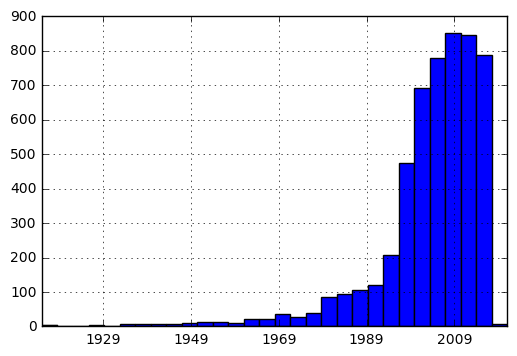

In [14]:
df.releasedate.hist(bins=30)

In [15]:
with open('budget_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)


In [16]:
with open('budget_data.pkl', 'rb') as picklefile:
    movies = pickle.load(picklefile)
    
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5285 entries, 0 to 5285
Data columns (total 7 columns):
releasedate    5285 non-null datetime64[ns]
movie          5285 non-null object
budget         5285 non-null int64
domgross       5285 non-null int64
intgross       5285 non-null int64
url            5285 non-null object
releaseyear    5285 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 330.3+ KB


In [67]:
def get_cast(movie_index, soup):
    cast_ids = []
    names = []
    for element in soup.find('div', id='cast').find_all('a'):
        cast_id = re.search('[0-9]+', element['href']).group()
        name = element.text
        
        cast_ids.append(cast_id)
        names.append(name)
        
    movie_index_list = [movie_index]*len(cast_ids)
    df = pd.DataFrame({'cast_id':cast_ids, 'name':names,}, columns=['cast_id', 'name'],
                     index=movie_index_list) 
    return df

def get_prod_cast(movie_index, soup):
    cast_to_get = ['Director', 'Screenwriter', 'Producer', 'Executive Producer']
    cast_ids = []
    names = []
    jobs = []
    for cast_title in cast_to_get:
        cast_results = soup.find_all(text=cast_title)
        
        for member in cast_results:
            tag = member.findParents(limit=2)[1]
            cast_id = re.search('[0-9]+', tag.a['href']).group()
            name = tag.a.text
            
            names.append(name)
            cast_ids.append(cast_id)
            jobs.append(str(member))
            
    movie_index_list = [movie_index]*len(cast_ids)
    df = pd.DataFrame({'cast_id':cast_ids, 'name':names, 'job':jobs}, columns=['cast_id', 'name', 'job'],
                     index=movie_index_list) 
    return df

def get_summary_datum(datum, soup):
    t = soup.find(text=datum)
    if t == None:
        return t
    string = t.findParents(limit=3)[2].text.split(':')[1]
    return string
    
def get_summary_data(soup):
    data_to_get = [u'MPAA\xa0Rating:', 'Running Time:', 'Genre:', 'Franchise:',
                       u'Production\xa0Method:', 'Production Companies:', 'Production Countries:']
    t = []
    for string in data_to_get:
        try:
            datum = get_summary_datum(string, soup)
            if datum == None:
                t.append('')
            else:
                t.append(datum)
        except:
            t.append('')
            msg = 'Get %s from %s failed' % (string, soup.find('h1', itemprop='name').text)
            logging.error(msg, exc_info=True)
    return t

def get_movie_data(movies, urls, path): #make sure movies in list/Series are unique, and indices are unique
    global cast
    global prod_cast
    for i in urls.index:
        response = requests.get(path + urls[i])
        if response.status_code != 200:
            msg = 'Get response from %s failed: %s' % (path + urls[i], response.status_code)
            logging.error(msg, exc_info=True)
        else:
            soup = BeautifulSoup(response.text, "lxml")
            summary_dict[i] = get_summary_data(soup)
            try:
                temp_df = get_cast(i, soup)
                cast = cast.append(temp_df)
            except:
                msg = 'Get cast from %s failed' % movies[i]
                logging.error(msg, exc_info=True)
            try:
                temp_df = get_prod_cast(i, soup)
                prod_cast = prod_cast.append(temp_df)
            except:
                msg = 'Get prod. cast from %s failed' % movies[i]
                logging.error(msg, exc_info=True)
            
            with open('cast_data.pkl', 'wb') as picklefile:
                pickle.dump(cast, picklefile)
            with open('prod_cast_data.pkl', 'wb') as picklefile:
                pickle.dump(prod_cast, picklefile)
            with open('summary_dict_data.pkl', 'wb') as picklefile:
                pickle.dump(summary_dict, picklefile)
                

In [63]:
# response = requests.get('http://www.the-numbers.com/movie/Avatar#tab=summary')
# soup = BeautifulSoup(response.text, 'lxml')
for e in soup.find_all(text='Director'):
    print str(e)

Director


In [105]:
# summary_dict = dict()
# urls = df.url
# path = 'http://www.the-numbers.com'
# movies = df.movie
# cast = pd.DataFrame(columns=['cast_id', 'name'])
# prod_cast = pd.DataFrame(columns=['cast_id', 'name', 'job'])

# get_movie_data(movies, urls, path)

# summary = pd.DataFrame.from_dict(summary_dict, orient='index')
# summary.columns = ['rating', 'runtime', 'genre', 'franchise', 'prod_method', 'prod_comp', 'prod_nat']

In [ ]:
# urls = df.url[2899:]
# movies = df.movie[2899:]

In [108]:
#  with open('summary_data.pkl', 'wb') as picklefile:
#                 pickle.dump(summary, picklefile)
# with open('budget_data.pkl', 'wb') as picklefile:
#                 pickle.dump(df, picklefile)

In [83]:
# with open('cast_data.pkl', 'rb') as picklefile:
#     cast_test = pickle.load(picklefile)
# with open('prod_cast_data.pkl', 'rb') as picklefile:
#     prod_cast_test = pickle.load(picklefile)
# with open('summary_dict_data.pkl', 'rb') as picklefile:
#     summary_dict_test = pickle.load(picklefile)

In [104]:
df.loc[1001]

releasedate            2004-06-11 00:00:00
movie                             Garfield
budget                            50000000
domgross                          75367693
intgross                         208094550
url            /movie/Garfield#tab=summary
releaseyear                           2004
Name: 1001, dtype: object

In [54]:
#prod_cast.merge(df.movie.to_frame(), how='left', left_index=True, right_index=True)
prod_cast.head()

cast_id           name                 job
0   23100401  James Cameron            Director
0   23100401  James Cameron        Screenwriter
0   23100401  James Cameron            Producer
0  190420401     Jon Landau            Producer
0  206830401   Colin Wilson  Executive Producer

In [41]:
#Figure out whether the above histogram is biased toward recent years, or what



# Get rid of stuff below? Or use to compare number of movies from 2016 to number of movies from 1990

# TIME ESTIMATE
# write functions to get my data. also deal with pickling/interrupts/problems: 2.5 hours
# TIME REALITY
# 4:20 hours to plan data grab and write functions to grab it

# TIME ESTIMATE
# finish writing functions to get data, and test them: 2.5 hours
# TIME REALITY
# 2.5 hours to write functions, start testing, and discover problems that I will need to fix

# TIME ESTIMATE
# 45 min to use movie ids instead of names as an identifier
# TIME REALITY
# 32 minutes!

# TIME ESTIMATE
# 45 min to set up pickling and test
# TIME REALITY
# 1:10 min